In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet


In [3]:
import zipfile
import os

zip_path = "archive.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()

os.listdir()


['.config', 'Sample - Superstore.csv', 'archive.zip', 'sample_data']

In [4]:
import pandas as pd
df = pd.read_csv("Sample - Superstore.csv", encoding="ISO-8859-1")
df.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
sales_df = df[['Order Date', 'Sales']]
sales_df.columns = ['ds', 'y']
sales_df.head()


,ds,y
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680


In [8]:
daily_sales = sales_df.groupby('ds').sum().reset_index()
daily_sales.head()


,ds,y
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


In [9]:
from prophet import Prophet
model = Prophet()
model.fit(daily_sales)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-03,1451.694034,-1226.250875,4386.503029,1451.694034,1451.694034,96.342359,96.342359,96.342359,419.731339,419.731339,419.731339,-323.388979,-323.388979,-323.388979,0.0,0.0,0.0,1548.036393
1,2014-01-04,1451.812178,-1906.666583,3927.018774,1451.812178,1451.812178,-399.119950,-399.119950,-399.119950,21.366500,21.366500,21.366500,-420.486450,-420.486450,-420.486450,0.0,0.0,0.0,1052.692228
2,2014-01-05,1451.930322,-1564.636730,3900.564493,1451.930322,1451.930322,-307.416317,-307.416317,-307.416317,203.612960,203.612960,203.612960,-511.029277,-511.029277,-511.029277,0.0,0.0,0.0,1144.514006
3,2014-01-06,1452.048467,-1488.038873,4200.386064,1452.048467,1452.048467,-182.199789,-182.199789,-182.199789,411.614941,411.614941,411.614941,-593.814730,-593.814730,-593.814730,0.0,0.0,0.0,1269.848678
4,2014-01-07,1452.166611,-2217.092385,3289.375209,1452.166611,1452.166611,-839.794939,-839.794939,-839.794939,-172.007872,-172.007872,-172.007872,-667.787067,-667.787067,-667.787067,0.0,0.0,0.0,612.371672


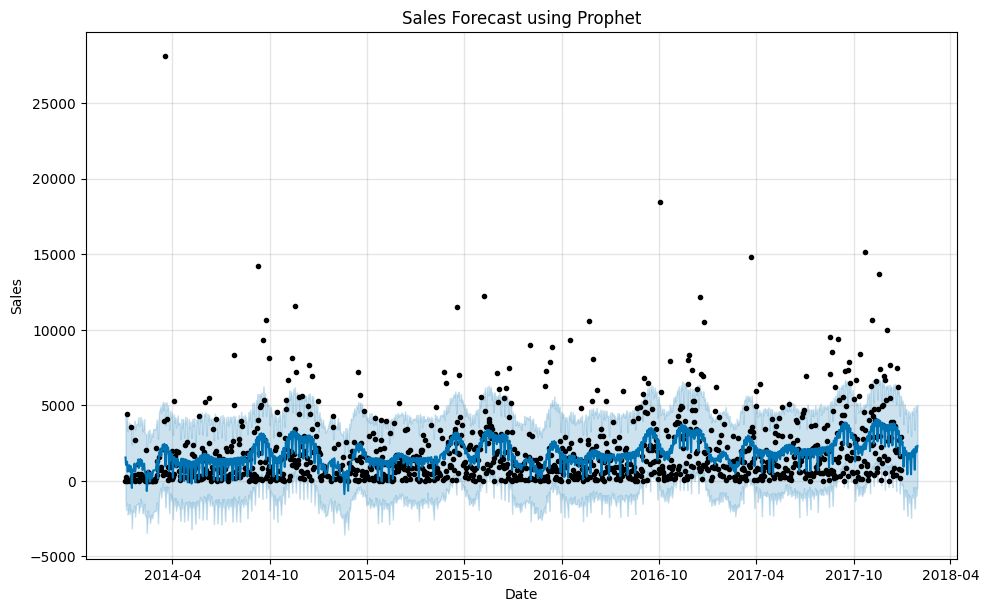

In [11]:
import matplotlib.pyplot as plt
fig = model.plot(forecast)
plt.title("Sales Forecast using Prophet")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

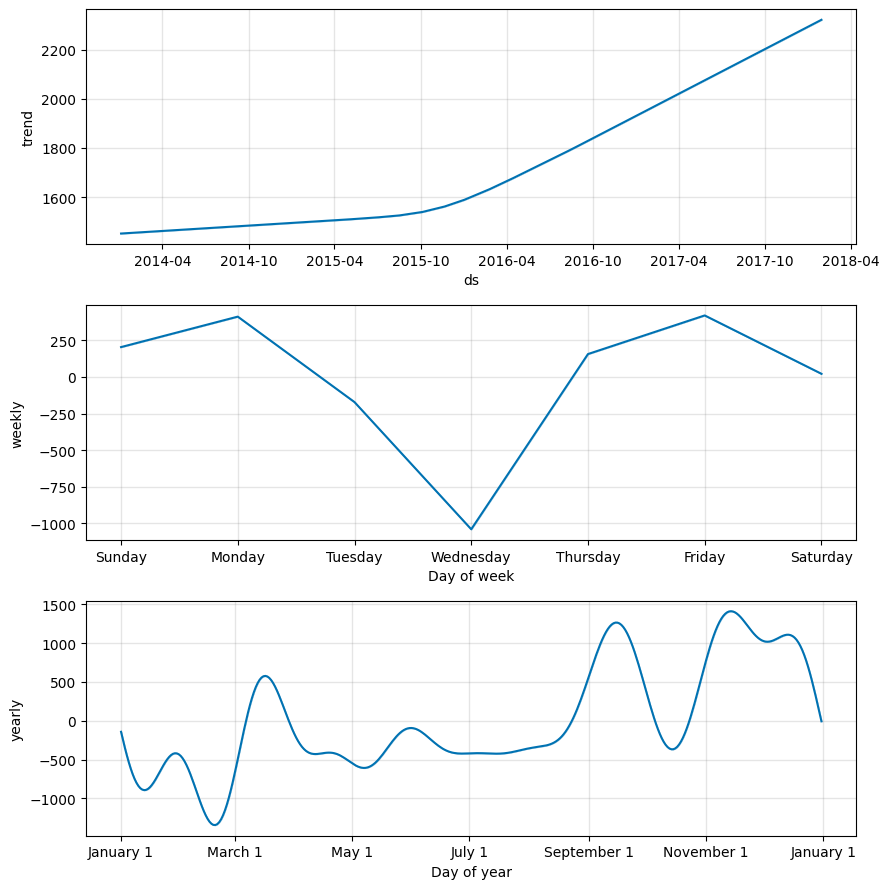

In [12]:
fig2 = model.plot_components(forecast)
plt.show()

In [13]:
#monthly averages
import pandas as pd

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['YearMonth'] = df['Order Date'].dt.to_period('M')  # e.g., 2025-01

monthly_avg = df.groupby('YearMonth')['Sales'].mean().reset_index()
monthly_avg.rename(columns={'Sales': 'Monthly_Avg_Sales'}, inplace=True)

print(monthly_avg.head())


  YearMonth  Monthly_Avg_Sales
0   2014-01         180.213861
1   2014-02          98.258522
2   2014-03         354.719803
3   2014-04         209.595148
4   2014-05         193.838418


In [17]:
#holiday spikes
holidays = ['2024-01-01', '2024-12-25', '2024-11-28']
holidays = pd.to_datetime(holidays)

df['Is_Holiday'] = df['Order Date'].isin(holidays).astype(int)

holiday_sales = df[df['Is_Holiday'] == 1].groupby('Order Date')['Sales'].sum().reset_index()
print(holiday_sales)


Empty DataFrame
Columns: [Order Date, Sales]
Index: []


In [15]:
forecast.to_csv('sales_forecast_for_powerbi.csv', index=False)

In [16]:
from google.colab import files
files.download('sales_forecast_for_powerbi.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>